In [39]:
import json
import requests
import webbrowser
import base64

client_id = 'CLIENT ID'
client_secret = 'CLIENT SECRET'
redirect_url = 'https://www.xero.com'
scope = 'offline_access accounting.transactions'
b64_id_secret = base64.b64encode(bytes(client_id + ':' + client_secret, 'utf-8')).decode('utf-8')


In [40]:
def XeroFirstAuth():
    auth_url = ('''https://login.xero.com/identity/connect/authorize?''' +
                '''response_type=code''' +
                '''&client_id=''' + client_id +
                '''&redirect_uri=''' + redirect_url +
                '''&scope=''' + scope +
                '''&state=123''')
    webbrowser.open_new(auth_url)
    
    auth_res_url = input('What is the response URL? ')
    start_number = auth_res_url.find('code=') + len('code=')
    end_number = auth_res_url.find('&scope')
    auth_code = auth_res_url[start_number:end_number]
    print(auth_code)
    print('\n')
    
    exchange_code_url = 'https://identity.xero.com/connect/token'
    response = requests.post(exchange_code_url, 
                            headers = {
                                'Authorization': 'Basic ' + b64_id_secret
                            },
                            data = {
                                'grant_type': 'authorization_code',
                                'code': auth_code,
                                'redirect_uri': redirect_url
                            })
    json_response = response.json()
    print(json_response)
    print('\n')
    
    return [json_response['access_token'], json_response['refresh_token']]


In [41]:
XeroFirstAuth()

PL5QM1NzrI7eD8bMGUO5GQbLkU7UEKP5pwgJnWZH4B8


{'access_token': 'eyJhbGciOiJSUzI1NiIsImtpZCI6IjFDQUY4RTY2NzcyRDZEQzAyOEQ2NzI2RkQwMjYxNTgxNTcwRUZDMTkiLCJ0eXAiOiJKV1QiLCJ4NXQiOiJISy1PWm5jdGJjQW8xbkp2MENZVmdWY09fQmsifQ.eyJuYmYiOjE3MjAwNDMyNDYsImV4cCI6MTcyMDA0NTA0NiwiaXNzIjoiaHR0cHM6Ly9pZGVudGl0eS54ZXJvLmNvbSIsImF1ZCI6Imh0dHBzOi8vaWRlbnRpdHkueGVyby5jb20vcmVzb3VyY2VzIiwiY2xpZW50X2lkIjoiNzM1QTg1OURCNjM1NDZCODk5REI0QTEwNDhBODc0RUQiLCJzdWIiOiIwNDE4MDc2ZWZkYTY1ZmQ4OTZmMmQyMzJkYzBlMjEzNiIsImF1dGhfdGltZSI6MTcyMDA0MzA5MSwieGVyb191c2VyaWQiOiIxNjdiYjg2NS0yMjA4LTRkMDMtYjA2YS0zZjgzZDk4NjMyYzQiLCJnbG9iYWxfc2Vzc2lvbl9pZCI6IjVmZjA4ODA3MGU5MzRkZTU5MGVkMTljNjliNWZhNTM2Iiwic2lkIjoiNWZmMDg4MDcwZTkzNGRlNTkwZWQxOWM2OWI1ZmE1MzYiLCJqdGkiOiJGQTMzREVDRUU4N0IwNjVGQjZBQkYyQkNFRjUyRDBCMCIsImF1dGhlbnRpY2F0aW9uX2V2ZW50X2lkIjoiZjU1MWFmZjItMDg2Ny00YjY5LTgyYTktOWVkNzFhZmU2MDQwIiwic2NvcGUiOlsiYWNjb3VudGluZy50cmFuc2FjdGlvbnMiLCJvZmZsaW5lX2FjY2VzcyJdLCJhbXIiOlsibGVnYWN5Il19.artCwItQkD2jKmbDf2PSvwj24bVFAzbSIvCstL8nUcfEInA4lgBa

['eyJhbGciOiJSUzI1NiIsImtpZCI6IjFDQUY4RTY2NzcyRDZEQzAyOEQ2NzI2RkQwMjYxNTgxNTcwRUZDMTkiLCJ0eXAiOiJKV1QiLCJ4NXQiOiJISy1PWm5jdGJjQW8xbkp2MENZVmdWY09fQmsifQ.eyJuYmYiOjE3MjAwNDMyNDYsImV4cCI6MTcyMDA0NTA0NiwiaXNzIjoiaHR0cHM6Ly9pZGVudGl0eS54ZXJvLmNvbSIsImF1ZCI6Imh0dHBzOi8vaWRlbnRpdHkueGVyby5jb20vcmVzb3VyY2VzIiwiY2xpZW50X2lkIjoiNzM1QTg1OURCNjM1NDZCODk5REI0QTEwNDhBODc0RUQiLCJzdWIiOiIwNDE4MDc2ZWZkYTY1ZmQ4OTZmMmQyMzJkYzBlMjEzNiIsImF1dGhfdGltZSI6MTcyMDA0MzA5MSwieGVyb191c2VyaWQiOiIxNjdiYjg2NS0yMjA4LTRkMDMtYjA2YS0zZjgzZDk4NjMyYzQiLCJnbG9iYWxfc2Vzc2lvbl9pZCI6IjVmZjA4ODA3MGU5MzRkZTU5MGVkMTljNjliNWZhNTM2Iiwic2lkIjoiNWZmMDg4MDcwZTkzNGRlNTkwZWQxOWM2OWI1ZmE1MzYiLCJqdGkiOiJGQTMzREVDRUU4N0IwNjVGQjZBQkYyQkNFRjUyRDBCMCIsImF1dGhlbnRpY2F0aW9uX2V2ZW50X2lkIjoiZjU1MWFmZjItMDg2Ny00YjY5LTgyYTktOWVkNzFhZmU2MDQwIiwic2NvcGUiOlsiYWNjb3VudGluZy50cmFuc2FjdGlvbnMiLCJvZmZsaW5lX2FjY2VzcyJdLCJhbXIiOlsibGVnYWN5Il19.artCwItQkD2jKmbDf2PSvwj24bVFAzbSIvCstL8nUcfEInA4lgBa6zhripoQOznxeD7w-rl4LWDx-npYsy6YoNjbK-RThFYsVJG_8YygX6rdIJbrv6

In [42]:
def XeroTenants(access_token):
    response = requests.get('https://api.xero.com/connections', 
                            headers = {
                                'Authorization': 'Bearer ' + access_token,
                                'Content-Type': 'application/json'
                            })
    json_response = response.json()
    print(json_response)
    
    tenant_id = json_response[0]['tenantId']
    return tenant_id


In [43]:
def XeroRefreshToken(refresh_token):
    response = requests.post('https://identity.xero.com/connect/token', 
                            headers = {
                                'Authorization': 'Basic ' + b64_id_secret
                            },
                            data = {
                                'grant_type': 'refresh_token',
                                'refresh_token': refresh_token
                            })
    json_response = response.json()
    print(json_response)
    
    new_refresh_token = json_response['refresh_token']
    rt_file = open('C:/folder/refresh_token.txt', 'w')
    rt_file.write(new_refresh_token)
    rt_file.close()
    
    return [json_response['access_token'], json_response['refresh_token']]


In [44]:
def XeroRequests():
    old_refresh_token = open('C:/folder/refresh_token.txt', 'r').read()
    new_tokens = XeroRefreshToken(old_refresh_token)
    xero_tenant_id = XeroTenants(new_tokens[0])
    
    get_url = 'https://api.xero.com/api.xro/2.0/Invoices'
    response = requests.get(get_url,
                           headers = {
                               'Authorization': 'Bearer ' + new_tokens[0],
                               'Xero-tenant-id': xero_tenant_id,
                               'Accept': 'application/json'
                           })
    if response.status_code == 200:
        json_response = response.json()
        print(json_response)
        
        xero_output = open('C:/folder/xero_output.txt', 'w')
        xero_output.write(response.text)
        xero_output.close()
    else:
        print(f"Error: {response.status_code}")
        print(response.text)


In [45]:
def export_csv():
    invoices = open(r'C:\\folder\\xero_output.txt', 'r').read()
    if not invoices.strip():
        print("Error: xero_output.txt is empty")
        return
    
    try:
        json_invoice = json.loads(invoices)
    except json.JSONDecodeError:
        print("Error: Failed to decode JSON")
        return
    
    analysis = open(r'C:\\folder\\analysis.csv', 'w')
    analysis.write('Type' + ',' + 'Total')
    analysis.write('\n')
    for invoice in json_invoice.get('Invoices', []):
        analysis.write(invoice['Type'] + ',' + str(invoice['Total']))
        analysis.write('\n')
    analysis.close()


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
def chart_data():
    df = pd.read_csv(r'C:\\folder\\analysis.csv')
    pvt = df[ ['Type','Total'] ].groupby('Type').sum()
    print(pvt)
    
    pvt.plot.bar(stacked=True)
    plt.show()


In [ ]:
export_csv()
chart_data()


In [47]:
old_tokens = XeroFirstAuth()
XeroRefreshToken(old_tokens[1])


C81LuezNEAoNjCl5FmhK6zbztApxevtM9Rk2nnIQV4A


{'access_token': 'eyJhbGciOiJSUzI1NiIsImtpZCI6IjFDQUY4RTY2NzcyRDZEQzAyOEQ2NzI2RkQwMjYxNTgxNTcwRUZDMTkiLCJ0eXAiOiJKV1QiLCJ4NXQiOiJISy1PWm5jdGJjQW8xbkp2MENZVmdWY09fQmsifQ.eyJuYmYiOjE3MjAwNDMyODUsImV4cCI6MTcyMDA0NTA4NSwiaXNzIjoiaHR0cHM6Ly9pZGVudGl0eS54ZXJvLmNvbSIsImF1ZCI6Imh0dHBzOi8vaWRlbnRpdHkueGVyby5jb20vcmVzb3VyY2VzIiwiY2xpZW50X2lkIjoiNzM1QTg1OURCNjM1NDZCODk5REI0QTEwNDhBODc0RUQiLCJzdWIiOiIwNDE4MDc2ZWZkYTY1ZmQ4OTZmMmQyMzJkYzBlMjEzNiIsImF1dGhfdGltZSI6MTcyMDA0MzA5MSwieGVyb191c2VyaWQiOiIxNjdiYjg2NS0yMjA4LTRkMDMtYjA2YS0zZjgzZDk4NjMyYzQiLCJnbG9iYWxfc2Vzc2lvbl9pZCI6IjVmZjA4ODA3MGU5MzRkZTU5MGVkMTljNjliNWZhNTM2Iiwic2lkIjoiNWZmMDg4MDcwZTkzNGRlNTkwZWQxOWM2OWI1ZmE1MzYiLCJqdGkiOiJGM0I3NEY0QzUwNjNBRDM1RTMwM0MzRDM2MUQ2NDU5MiIsImF1dGhlbnRpY2F0aW9uX2V2ZW50X2lkIjoiMDdiMGU2MTAtZTUwYy00MGQ3LThmY2ItNTZhNGRlNGVlYjdlIiwic2NvcGUiOlsiYWNjb3VudGluZy50cmFuc2FjdGlvbnMiLCJvZmZsaW5lX2FjY2VzcyJdLCJhbXIiOlsibGVnYWN5Il19.eGbJnIO121minshP3ew19ERgIPD-iIze5-OJ1SYpKYWOirZFxg5B

['eyJhbGciOiJSUzI1NiIsImtpZCI6IjFDQUY4RTY2NzcyRDZEQzAyOEQ2NzI2RkQwMjYxNTgxNTcwRUZDMTkiLCJ0eXAiOiJKV1QiLCJ4NXQiOiJISy1PWm5jdGJjQW8xbkp2MENZVmdWY09fQmsifQ.eyJuYmYiOjE3MjAwNDMyODUsImV4cCI6MTcyMDA0NTA4NSwiaXNzIjoiaHR0cHM6Ly9pZGVudGl0eS54ZXJvLmNvbSIsImF1ZCI6Imh0dHBzOi8vaWRlbnRpdHkueGVyby5jb20vcmVzb3VyY2VzIiwiY2xpZW50X2lkIjoiNzM1QTg1OURCNjM1NDZCODk5REI0QTEwNDhBODc0RUQiLCJzdWIiOiIwNDE4MDc2ZWZkYTY1ZmQ4OTZmMmQyMzJkYzBlMjEzNiIsImF1dGhfdGltZSI6MTcyMDA0MzA5MSwieGVyb191c2VyaWQiOiIxNjdiYjg2NS0yMjA4LTRkMDMtYjA2YS0zZjgzZDk4NjMyYzQiLCJnbG9iYWxfc2Vzc2lvbl9pZCI6IjVmZjA4ODA3MGU5MzRkZTU5MGVkMTljNjliNWZhNTM2Iiwic2lkIjoiNWZmMDg4MDcwZTkzNGRlNTkwZWQxOWM2OWI1ZmE1MzYiLCJqdGkiOiJGM0I3NEY0QzUwNjNBRDM1RTMwM0MzRDM2MUQ2NDU5MiIsImF1dGhlbnRpY2F0aW9uX2V2ZW50X2lkIjoiMDdiMGU2MTAtZTUwYy00MGQ3LThmY2ItNTZhNGRlNGVlYjdlIiwic2NvcGUiOlsiYWNjb3VudGluZy50cmFuc2FjdGlvbnMiLCJvZmZsaW5lX2FjY2VzcyJdLCJhbXIiOlsibGVnYWN5Il19.eGbJnIO121minshP3ew19ERgIPD-iIze5-OJ1SYpKYWOirZFxg5BvVo__bW2ujRDgWu26ums4Ya-hYCH6-n5GKwdcOt-TFnWflHS4885uc-c_4PWEU

{'access_token': 'eyJhbGciOiJSUzI1NiIsImtpZCI6IjFDQUY4RTY2NzcyRDZEQzAyOEQ2NzI2RkQwMjYxNTgxNTcwRUZDMTkiLCJ0eXAiOiJKV1QiLCJ4NXQiOiJISy1PWm5jdGJjQW8xbkp2MENZVmdWY09fQmsifQ.eyJuYmYiOjE3MjAwNDMyOTksImV4cCI6MTcyMDA0NTA5OSwiaXNzIjoiaHR0cHM6Ly9pZGVudGl0eS54ZXJvLmNvbSIsImF1ZCI6Imh0dHBzOi8vaWRlbnRpdHkueGVyby5jb20vcmVzb3VyY2VzIiwiY2xpZW50X2lkIjoiNzM1QTg1OURCNjM1NDZCODk5REI0QTEwNDhBODc0RUQiLCJzdWIiOiIwNDE4MDc2ZWZkYTY1ZmQ4OTZmMmQyMzJkYzBlMjEzNiIsImF1dGhfdGltZSI6MTcyMDA0MzA5MSwieGVyb191c2VyaWQiOiIxNjdiYjg2NS0yMjA4LTRkMDMtYjA2YS0zZjgzZDk4NjMyYzQiLCJnbG9iYWxfc2Vzc2lvbl9pZCI6IjVmZjA4ODA3MGU5MzRkZTU5MGVkMTljNjliNWZhNTM2Iiwic2lkIjoiNWZmMDg4MDcwZTkzNGRlNTkwZWQxOWM2OWI1ZmE1MzYiLCJqdGkiOiJGM0I3NEY0QzUwNjNBRDM1RTMwM0MzRDM2MUQ2NDU5MiIsImF1dGhlbnRpY2F0aW9uX2V2ZW50X2lkIjoiMDdiMGU2MTAtZTUwYy00MGQ3LThmY2ItNTZhNGRlNGVlYjdlIiwic2NvcGUiOlsiYWNjb3VudGluZy50cmFuc2FjdGlvbnMiLCJvZmZsaW5lX2FjY2VzcyJdLCJhbXIiOlsibGVnYWN5Il19.B2G8wvpeGxqFLdi2x8_zcQOuXFomn2ffW_mBZ7e-hDlJ2HUI5cfNMIJUIZwpxSn7o54dwCUf8JtMZ1kpulQbH0C7Mmpk60CEm7

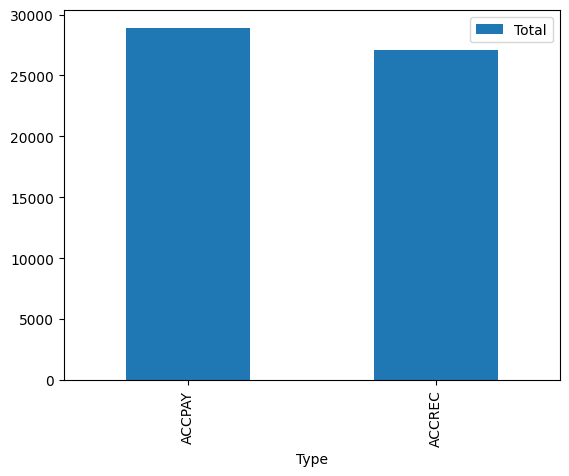

In [48]:
XeroRequests()
export_csv()
chart_data()
